In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [23]:
pwd()

'C:\\Users\\ntshu\\Desktop\\DataScience_Resorces\\Machine Learning\\LinearRegression-master (1)\\LinearRegression-master\\LinearRegressionTillCloud'

In [24]:
df= pd.read_csv('Admission_Prediction.csv')

In [25]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [26]:
df.shape

(500, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [28]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [29]:
df['GRE Score'].mode()

0    312.0
1    324.0
dtype: float64

In [30]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)

In [31]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)

In [32]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [33]:
x=df.drop(['Chance of Admit', 'Serial No.'], axis=1)
y=df['Chance of Admit']

In [34]:
x.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [35]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

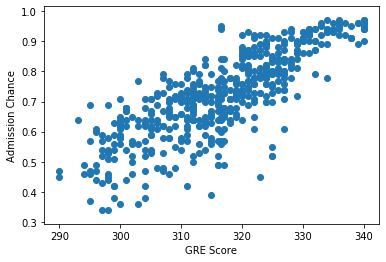

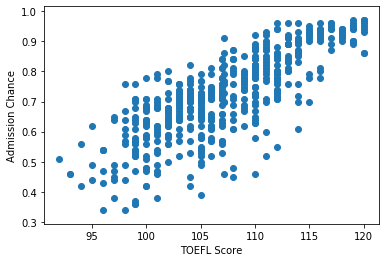

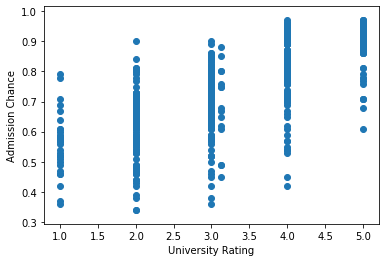

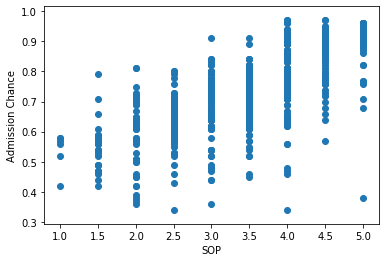

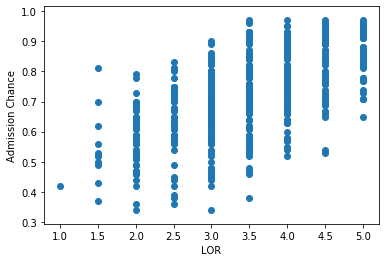

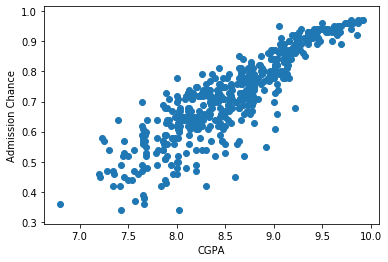

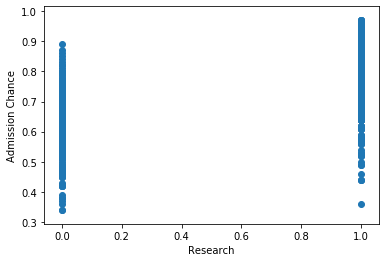

In [36]:
for col in x.columns:
    if(col != ['Chance of Admit']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('Admission Chance')
        plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler_feature =StandardScaler()
scaler_label=StandardScaler()
scaler_data=scaler_feature.fit_transform(x)
scaler_data

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [69]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20, random_state=100)

In [70]:
type(train_x)

pandas.core.frame.DataFrame

In [71]:
type(scaler_data)

numpy.ndarray

In [72]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#calculating the accuracy
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8130028911531255

In [74]:
reg.predict(test_x)

array([0.85808691, 0.47640984, 0.63129894, 0.44923247, 0.64780201,
       0.85600752, 0.58350967, 0.67243439, 0.81616452, 0.68523072,
       0.66516692, 0.62148025, 0.89253726, 0.76275472, 0.6348937 ,
       0.50565817, 0.59259132, 0.74655837, 0.56215704, 0.72073134,
       0.89846559, 0.61164642, 0.84884621, 0.8259716 , 0.99496159,
       0.6051041 , 0.68562659, 0.93414602, 0.87779076, 0.70903957,
       0.78415066, 0.85195158, 0.75513619, 0.55532366, 0.73997362,
       0.78617439, 0.79391018, 0.581841  , 0.53773195, 0.70629831,
       0.94811889, 0.58639014, 0.83242618, 0.78594015, 0.81176258,
       0.54823434, 0.59656488, 0.87758771, 0.94841544, 0.60255148,
       0.81988187, 0.71615764, 0.81030402, 0.99003443, 0.64406696,
       0.85587697, 0.61844263, 0.8956448 , 0.77703905, 0.74017302,
       0.68467339, 0.62562555, 0.48034523, 0.88223253, 0.64872641,
       0.6852793 , 0.70447548, 0.4630244 , 0.83949068, 0.84401807,
       0.92678342, 0.77766435, 0.66193476, 0.83490803, 0.65242

In [75]:
test_y

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
460    0.77
152    0.86
154    0.80
56     0.64
392    0.84
Name: Chance of Admit, Length: 100, dtype: float64

In [76]:
#save the model
filename = 'ntsh_model.pickle'
pickle.dump(reg,open(filename,'wb'))


In [77]:
loaded_model = pickle.load(open(filename,'rb'))
a=loaded_model.predict([[250,68,5,5,4,10,1]])
a

array([0.70559846])